# Exploratory Data Analysis

### Authors:
- Ana Farinha | 20211514
- Ana Reis | 20211631
- Beatriz Barreto | 20211547

### Introduction

Exploratory Data Analysis, also known as EDA, is an essential step in data analysis that encompasses several statistical and graphical techniques. It involves examining and understanding the data in order to uncover patterns and trends, detect outliers and anomalies and explore relationships between variables. <br>

In this notebook we will import our dataset and check for duplicates, missing values and the data types. We will do some summary statistics and try to identify anomalies and outliers as well as create new variables that might be helpeful in our future analysis. Furthermore, we will visualize our data with the help of boxplots, scatter plots, barcharts, pie charts and a map and also do a correlation matrix between our variables.<br>

In the end, we will export our new dataset to be used in the next step of our analysis.

## 1. Import Libraries and Utilities

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import plotly.express as px # map
from pandas.plotting import scatter_matrix # scatter matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import utilities
from utils import *
from visualizations import *

## 2. Import Dataset

In [3]:
# Import dataset
cust_info = data_load('.\\Data\\Customer Info Dataset.csv')

In [4]:
# See dataset
cust_info.head()

customer_id          customer_name customer_gender   customer_birthdate  \
0         4239         Sara Moscowitz          female  09/10/1999 03:11 PM   
1        19330       Donald Robertson            male  06/26/1981 10:58 PM   
2         2272  Phd. Felicia Bradshaw          female  01/31/1987 09:08 AM   
3        25288          Emma Williams          female  06/17/1942 12:02 AM   
4        12829           Hilda Huerta          female  01/31/2000 11:43 AM   

   kids_home  teens_home  number_complaints  distinct_stores_visited  \
0        0.0         0.0                0.0                      2.0   
1        1.0         0.0                0.0                      2.0   
2        1.0         1.0                0.0                     20.0   
3        3.0         4.0                1.0                      2.0   
4        0.0         0.0                0.0                      2.0   

   lifetime_spend_groceries  lifetime_spend_electronics  ...  \
0                      91.0                        20.0  ...   
1                     197.0                      5958.0  ...   
2                     397.0                        20.0  ...   
3                    5282.0                       237.0  ...   
4                      82.0                        22.0  ...   

   lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
0                 53.0                 48.0                    47.0   
1                 86.0                 80.0                    45.0   
2                204.0                170.0                    46.0   
3               1081.0               1068.0                   617.0   
4                 39.0                 39.0                    48.0   

   lifetime_spend_videogames  lifetime_total_distinct_products  \
0                      105.0                              85.0   
1                     1964.0                              85.0   
2                        5.0                             408.0   
3                     1078.0                            1956.0   
4                      103.0                              83.0   

   percentage_of_products_bought_promotion  year_first_transaction  \
0                                 0.192154                  2017.0   
1                                 0.098647                  2015.0   
2                                 0.497251                  2008.0   
3                                 0.206713                  2010.0   
4                                 0.200625                  2015.0   

   loyalty_card_number   latitude  longitude  
0                  NaN  38.754263  -9.163397  
1                  NaN  38.777761  -9.156197  
2                  NaN  38.785329  -9.127113  
3                  NaN  38.744086  -9.156589  
4                  NaN  38.756024  -9.162970  

[5 rows x 24 columns]

## 3. Check duplicates 

In [5]:
# Search for duplicated 'customer_id'
cust_info['customer_id'].duplicated().sum()

0

Since there are no duplicates in the `customer_id` we can set it as index.

In [6]:
# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

## 4. Check Data Types 

In [7]:
cust_info.dtypes

customer_name                               object
customer_gender                             object
customer_birthdate                          object
kids_home                                  float64
teens_home                                 float64
number_complaints                          float64
distinct_stores_visited                    float64
lifetime_spend_groceries                   float64
lifetime_spend_electronics                 float64
typical_hour                               float64
lifetime_spend_vegetables                  float64
lifetime_spend_nonalcohol_drinks           float64
lifetime_spend_alcohol_drinks              float64
lifetime_spend_meat                        float64
lifetime_spend_fish                        float64
lifetime_spend_hygiene                     float64
lifetime_spend_videogames                  float64
lifetime_total_distinct_products           float64
percentage_of_products_bought_promotion    float64
year_first_transaction         

### 4.1 Necessary changes to datatypes

Transform dates into pandas datetime object.

In [8]:
convert_to_dt(cust_info, 'customer_birthdate')
cust_info['year_first_transaction'] = pd.to_datetime(cust_info['year_first_transaction'], format='%Y').dt.year

Transform float variables into integers.

In [9]:
cust_info = float_to_int(cust_info, ['kids_home',
                                     'teens_home',
                                     'number_complaints',
                                     'distinct_stores_visited',
                                     'year_first_transaction',
                                     'loyalty_card_number'])

In [10]:
cust_info

customer_name customer_gender  customer_birthdate  \
customer_id                                                              
4239                Sara Moscowitz          female 1999-09-10 15:11:00   
19330             Donald Robertson            male 1981-06-26 22:58:00   
2272         Phd. Felicia Bradshaw          female 1987-01-31 09:08:00   
25288                Emma Williams          female 1942-06-17 00:02:00   
12829                 Hilda Huerta          female 2000-01-31 11:43:00   
...                            ...             ...                 ...   
625               Phd. Karen Watts          female 1974-11-01 05:26:00   
26447              Curtis Thompson            male 1986-02-21 11:27:00   
182                 Richard Carter            male 2001-01-14 05:49:00   
13768                  Jerry Yoder            male 1958-08-21 12:12:00   
2570             Phd. James Cooper            male 1944-01-16 09:35:00   

             kids_home  teens_home  number_complaints  \
customer_id                                             
4239                 0           0                  0   
19330                1           0                  0   
2272                 1           1                  0   
25288                3           4                  1   
12829                0           0                  0   
...                ...         ...                ...   
625                  0           0                  1   
26447                0           0                  0   
182                  0           0                  0   
13768                1           0                  1   
2570                 1           1                  0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
4239                               2                      91.0   
19330                              2                     197.0   
2272                              20                     397.0   
25288                              2                    5282.0   
12829                              2                      82.0   
...                              ...                       ...   
625                                2                     209.0   
26447                              3                     185.0   
182                                2                      83.0   
13768                             20                     391.0   
2570                               2                     834.0   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
4239                               20.0          22.0  ...   
19330                            5958.0          21.0  ...   
2272                               20.0           9.0  ...   
25288                             237.0          12.0  ...   
12829                              22.0          21.0  ...   
...                                 ...           ...  ...   
625                              5474.0          20.0  ...   
26447                            1066.0          15.0  ...   
182                                23.0          23.0  ...   
13768                              20.0          10.0  ...   
2570                              596.0          18.0  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
4239                        53.0                 48.0                    47.0   
19330                       86.0                 80.0                    45.0   
2272                       204.0                170.0                    46.0   
25288                     1081.0               1068.0                   617.0   
12829                       39.0                 39.0                    48.0   
...                          ...                  ...                     ...   
62

### 4.2. Separate categorical and numerical variables

In [11]:
cat_cust_info, num_cust_info = categorical_numerical(
    cust_info,
    ['customer_name'],
    ['customer_birthdate',
     'loyalty_card_number',
     'latitude', 'longitude'
    ]
)

In [12]:
# See categorical DataFrame
cat_cust_info

customer_gender
customer_id                
4239                 female
19330                  male
2272                 female
25288                female
12829                female
...                     ...
625                  female
26447                  male
182                    male
13768                  male
2570                   male

[30000 rows x 1 columns]

In [13]:
# See numerical DataFrame
num_cust_info

kids_home  teens_home  number_complaints  \
customer_id                                             
4239                 0           0                  0   
19330                1           0                  0   
2272                 1           1                  0   
25288                3           4                  1   
12829                0           0                  0   
...                ...         ...                ...   
625                  0           0                  1   
26447                0           0                  0   
182                  0           0                  0   
13768                1           0                  1   
2570                 1           1                  0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
4239                               2                      91.0   
19330                              2                     197.0   
2272                              20                     397.0   
25288                              2                    5282.0   
12829                              2                      82.0   
...                              ...                       ...   
625                                2                     209.0   
26447                              3                     185.0   
182                                2                      83.0   
13768                             20                     391.0   
2570                               2                     834.0   

             lifetime_spend_electronics  typical_hour  \
customer_id                                             
4239                               20.0          22.0   
19330                            5958.0          21.0   
2272                               20.0           9.0   
25288                             237.0          12.0   
12829                              22.0          21.0   
...                                 ...           ...   
625                              5474.0          20.0   
26447                            1066.0          15.0   
182                                23.0          23.0   
13768                              20.0          10.0   
2570                              596.0          18.0   

             lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
customer_id                                                                
4239                              22.0                             195.0   
19330                             20.0                            1435.0   
2272                             310.0                             379.0   
25288                            499.0                             873.0   
12829                              9.0                             172.0   
...                                ...                               ...   
625                               18.0                            1435.0   
26447                            267.0                             276.0   
182                               23.0                             189.0   
13768                            295.0                             301.0   
2570                             339.0                             522.0   

             lifetime_spend_alcohol_drinks  lifetime_spend_meat  \
customer_id                                                       
4239                                 964.0                 53.0   
19330                                434.0                 86.0   
2272                                 222.0                204.0   
25288                                460.0               1081.0   
12829                                856.0                 39.0   
...                                    ...                  ...   
625                                  521.0                 21.0   
26447                                287.0                 47.0   
182        

## 5. Missing Values 

In [14]:
# Search for missing data
cust_info.isna().sum()

customer_name                                  0
customer_gender                                0
customer_birthdate                             0
kids_home                                      0
teens_home                                     0
number_complaints                              0
distinct_stores_visited                        0
lifetime_spend_groceries                       0
lifetime_spend_electronics                     0
typical_hour                                   0
lifetime_spend_vegetables                      0
lifetime_spend_nonalcohol_drinks               0
lifetime_spend_alcohol_drinks                  0
lifetime_spend_meat                            0
lifetime_spend_fish                            0
lifetime_spend_hygiene                         0
lifetime_spend_videogames                      0
lifetime_total_distinct_products               0
percentage_of_products_bought_promotion        0
year_first_transaction                         0
loyalty_card_number 

## 6. Summary Statistics 

In [15]:
# Get to know the dataset
cust_info.describe().T

count           mean          std  \
kids_home                                30000.0         1.1467     1.234111   
teens_home                               30000.0       0.512933     0.912502   
number_complaints                        30000.0       0.764367     0.836341   
distinct_stores_visited                  30000.0       6.120767      6.51141   
lifetime_spend_groceries                 30000.0    3978.634251  5280.641466   
lifetime_spend_electronics               30000.0     965.238793  1755.323397   
typical_hour                             30000.0           -inf          NaN   
lifetime_spend_vegetables                30000.0     564.207835   481.819086   
lifetime_spend_nonalcohol_drinks         30000.0     628.750142     496.3464   
lifetime_spend_alcohol_drinks            30000.0     379.344543     236.2064   
lifetime_spend_meat                      30000.0     513.878374   575.448347   
lifetime_spend_fish                      30000.0     777.151833  3036.405862   
lifetime_spend_hygiene                   30000.0     162.824538   168.547217   
lifetime_spend_videogames                30000.0           -inf          NaN   
lifetime_total_distinct_products         30000.0      1123.8873  1423.956421   
percentage_of_products_bought_promotion  30000.0       0.190981     0.145402   
year_first_transaction                   30000.0    2008.684067     4.992296   
loyalty_card_number                       5825.0  949911.497854  28920.11643   
latitude                                 30000.0      38.748224     0.024788   
longitude                                30000.0       -9.15774     0.025749   

                                               min       25%       50%  \
kids_home                                      0.0       0.0       1.0   
teens_home                                     0.0       0.0       0.0   
number_complaints                              0.0       0.0       1.0   
distinct_stores_visited                        0.0       2.0       3.0   
lifetime_spend_groceries                       0.0     220.0     950.0   
lifetime_spend_electronics                1.058527      45.0     194.0   
typical_hour                                  -inf       9.0      14.0   
lifetime_spend_vegetables                      1.0     247.0     425.0   
lifetime_spend_nonalcohol_drinks               0.0     244.0     425.0   
lifetime_spend_alcohol_drinks                  0.0     193.0     419.0   
lifetime_spend_meat                            0.0      46.0     164.0   
lifetime_spend_fish                            0.0      48.0     166.0   
lifetime_spend_hygiene                         0.0      50.0      89.0   
lifetime_spend_videogames                     -inf      46.0      92.0   
lifetime_total_distinct_products               0.0     116.0     427.0   
percentage_of_products_bought_promotion    0.02192  0.099313  0.149777   
year_first_transaction                      1989.0    2006.0    2009.0   
loyalty_card_number                       900039.0  924547.0  950215.0   
latitude                                 38.653348  38.73115   38.7482   
longitude                                 -9.21524  -9.17777  -9.15928   

                                               75%        max  
kids_home                                      1.0       10.0  
teens_home                                     1.0        9.0  
number_complaints                              1.0        9.0  
distinct_stores_visited                        8.0       21.0  
lifetime_spend_groceries                    5253.0    18852.0  
lifetime_spend_electronics                   721.0     6603.0  
typical_hour                                  20.0       23.0  
lifetime_spend_vegetables                    785.0     1568.0  
lifetime_spend_nonalcohol_drinks             949.0     1671.0  
lifetime_spend_alcohol_drinks                537.0     1048.0  
lifetime_spend_meat                         1078.0     1860.0  
lifetime_spend_fish                    

## 7. Identify Anomalies

Check if year of birth is smaller than the year of the first transaction.

In [16]:
# Transform `year_first_transation` to datetime with day and month
cust_info['year_first_transaction'] = pd.to_datetime(
    '01-01-'+ cust_info['year_first_transaction'].astype(str)
    )

In [17]:
# See clients younger than 16 (legal age)
cust_info[cust_info['customer_birthdate'].dt.year >
          cust_info['year_first_transaction'].dt.year - 16]

customer_name customer_gender  customer_birthdate  \
customer_id                                                            
12829               Hilda Huerta          female 2000-01-31 11:43:00   
15901              Sabra Terrell          female 1988-02-17 09:22:00   
17585          George Degasperis            male 1995-01-26 10:32:00   
4828          Bsc. Michael Pence            male 1986-08-13 06:22:00   
14909                 Kathy King          female 1990-03-11 10:59:00   
...                          ...             ...                 ...   
9969          Phd. Kathy Commons          female 1991-08-14 06:19:00   
19399                 Lura Burke          female 1997-04-27 17:22:00   
13776        Msc. Alberta Priddy          female 1995-02-14 19:02:00   
29519            Sandy Robertson          female 1998-11-20 00:55:00   
182               Richard Carter            male 2001-01-14 05:49:00   

             kids_home  teens_home  number_complaints  \
customer_id                                             
12829                0           0                  0   
15901                1           0                  2   
17585                1           0                  1   
4828                 1           0                  1   
14909                1           0                  1   
...                ...         ...                ...   
9969                 2           0                  0   
19399                1           1                  1   
13776                0           0                  0   
29519                1           1                  2   
182                  0           0                  0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
12829                              2                      82.0   
15901                              8                   14784.0   
17585                              8                   16931.0   
4828                               8                   14748.0   
14909                              2                     118.0   
...                              ...                       ...   
9969                               2                     848.0   
19399                              1                     331.0   
13776                              4                    6595.0   
29519                             20                     385.0   
182                                2                      83.0   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
12829                              22.0          21.0  ...   
15901                             196.0          18.0  ...   
17585                             195.0          12.0  ...   
4828                              208.0           3.0  ...   
14909                             462.0           7.0  ...   
...                                 ...           ...  ...   
9969                               47.0           8.0  ...   
19399                              55.0          13.0  ...   
13776                            1079.0          18.0  ...   
29519                              20.0           7.0  ...   
182                                23.0          23.0  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
12829                       39.0                 39.0                    48.0   
15901                     1528.0               1603.0                   114.0   
17585                     1473.0               1474.0                   269.0   
4828                      1616.0               1419.0                   279.0   
14909                      122.0                215.0                    52.0   
...                          ...                  ...                     ...   
9969                      

In [18]:
# Replace the year of birth so that all have at least
# 16 years in the year of first transaction
cust_info['customer_birthdate'] = np.where(
    cust_info['customer_birthdate'].dt.year >
          cust_info['year_first_transaction'].dt.year - 16,
    cust_info['year_first_transaction'] - pd.offsets.DateOffset(years=16),
    cust_info['customer_birthdate'])

In [19]:
# Confirm that there ar no ilegal customers
sum(cust_info['customer_birthdate'].dt.year >
          cust_info['year_first_transaction'].dt.year - 16)

0

In [20]:
# Make `year_first_transaction` just a year
cust_info['year_first_transaction'] = cust_info['year_first_transaction'].dt.year.astype(int)

Check `typical_hours` infinite values

In [21]:
# See infinite values
inf_typ_h = cust_info[np.isinf(cust_info['typical_hour']) == True]
inf_typ_h

customer_name customer_gender  customer_birthdate  \
customer_id                                                              
8592         Charles`s Supermarket            male 1988-01-18 04:13:00   
101            Annie`s Supermarket          female 1947-11-23 10:33:00   

             kids_home  teens_home  number_complaints  \
customer_id                                             
8592                 0           0                  0   
101                  0           0                  0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
8592                               1                   2.64414   
101                                1                   2.65918   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
8592                           1.130447          -inf  ...   
101                            1.133150          -inf  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
8592                    2.615969              35005.0                1.540302   
101                     2.608573              34702.0                1.553652   

             lifetime_spend_videogames  lifetime_total_distinct_products  \
customer_id                                                                
8592                              -inf                           0.95716   
101                               -inf                           0.91589   

             percentage_of_products_bought_promotion  year_first_transaction  \
customer_id                                                                    
8592                                        0.196409                    2013   
101                                         0.194451                    2009   

             loyalty_card_number   latitude  longitude  
customer_id                                             
8592                        <NA>  38.866685  -9.111366  
101                       910065  38.866048  -9.111718  

[2 rows x 23 columns]

In [22]:
# Drop infinite values
cust_info = cust_info[~cust_info.isin(inf_typ_h).all(1)]
cust_info.shape

(29998, 23)

Transform `typical_hour` to datetime format.

In [23]:
cust_info['typical_hour'] = pd.to_datetime(cust_info['typical_hour'], format='%H').dt.hour
cust_info['typical_hour']

customer_id
4239     22
19330    21
2272      9
25288    12
12829    21
         ..
625      20
26447    15
182      23
13768    10
2570     18
Name: typical_hour, Length: 29998, dtype: int64

Check infinite values in `lifetime_spend_videogames`

In [24]:
# Check infinite values
cust_info[np.isinf(cust_info['lifetime_spend_videogames']) == True]

customer_name customer_gender  customer_birthdate  \
customer_id                                                              
1441          Fausto`s Supermarket            male 1989-01-23 11:26:00   
3399           Sandy`s Supermarket          female 1970-07-11 12:57:00   
8086          Eugene`s Supermarket            male 1956-02-29 20:26:00   
9706         Michele`s Supermarket          female 1962-12-06 02:12:00   
17805         Robert`s Supermarket            male 1982-09-22 03:36:00   
...                            ...             ...                 ...   
4689          Justin`s Supermarket            male 1959-03-20 15:59:00   
16270        Melissa`s Supermarket          female 1992-01-01 00:00:00   
10262        Francis`s Supermarket            male 1970-11-05 01:58:00   
25570          Tracy`s Supermarket          female 1976-06-11 14:22:00   
25779         Robert`s Supermarket            male 1965-01-07 03:32:00   

             kids_home  teens_home  number_complaints  \
customer_id                                             
1441                 0           0                  0   
3399                 0           0                  0   
8086                 0           0                  0   
9706                 0           0                  0   
17805                0           0                  0   
...                ...         ...                ...   
4689                 0           0                  0   
16270                0           0                  0   
10262                0           0                  0   
25570                0           0                  0   
25779                0           0                  0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
1441                               1                  2.678482   
3399                               1                  2.797932   
8086                               1                  2.802438   
9706                               1                  2.844843   
17805                              1                  2.751432   
...                              ...                       ...   
4689                               1                  2.741558   
16270                              1                  2.768803   
10262                              1                  2.788190   
25570                              1                  2.741804   
25779                              1                  2.650834   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
1441                           1.095507             0  ...   
3399                           1.141087             0  ...   
8086                           1.146242             0  ...   
9706                           1.184050             0  ...   
17805                          1.127715             0  ...   
...                                 ...           ...  ...   
4689                           1.113587             0  ...   
16270                          1.175120             0  ...   
10262                          1.130447             0  ...   
25570                          1.163490             0  ...   
25779                          1.133150             0  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
1441                    2.613335              34425.0                1.556140   
3399                    2.623429              36152.0                1.555148   
8086                    2.612483              34777.0                1.530623   
9706                    2.615854              35000.0                1.555148   
17805                   2.619223              35809.0                1.553152   
...                          ...                  ...                     ...   
46

In [25]:
# Impute infinite values with 0
cust_info['lifetime_spend_videogames'].replace([np.inf, -np.inf], 0, inplace=True)

In [26]:
# Check infinite values
cust_info[np.isinf(cust_info['lifetime_spend_videogames']) == True]

Empty DataFrame
Columns: [customer_name, customer_gender, customer_birthdate, kids_home, teens_home, number_complaints, distinct_stores_visited, lifetime_spend_groceries, lifetime_spend_electronics, typical_hour, lifetime_spend_vegetables, lifetime_spend_nonalcohol_drinks, lifetime_spend_alcohol_drinks, lifetime_spend_meat, lifetime_spend_fish, lifetime_spend_hygiene, lifetime_spend_videogames, lifetime_total_distinct_products, percentage_of_products_bought_promotion, year_first_transaction, loyalty_card_number, latitude, longitude]
Index: []

[0 rows x 23 columns]

## 8. Feature Engineering

Converting date of birth to customer's age.

In [27]:
# Calculate age of each customer
calc_age(cust_info)
cust_info['age']

customer_id
4239     23
19330    41
2272     36
25288    81
12829    24
         ..
625      48
26447    37
182      23
13768    64
2570     79
Name: age, Length: 29998, dtype: int32

Level of education in the variable name

In [28]:
# See pattern in names
cust_info['customer_name'].head(20)

customer_id
4239              Sara Moscowitz
19330           Donald Robertson
2272       Phd. Felicia Bradshaw
25288              Emma Williams
12829               Hilda Huerta
12267         Bsc. Anthony Brown
10548       Phd. Kimberly Milton
11199               Robert Smith
26762               Alan Lambert
457            Msc. Pamela Moser
15901              Sabra Terrell
8267           Denise Standridge
22941                 John Abreu
2803     Bsc. Kimberly Whitehead
20623             Cedrick Villar
2345          Bsc. Henry Schultz
19722                 Ann Murphy
17585          George Degasperis
1702           Phd. Robert Pires
15914             Fannie Onisick
Name: customer_name, dtype: object

In [29]:
# See level of education of each customer
# based on their name
cust_info['education'] = cust_info['customer_name'].apply(education)
cust_info['education']

customer_id
4239       HS
19330      HS
2272     Phd.
25288      HS
12829      HS
         ... 
625      Phd.
26447      HS
182        HS
13768      HS
2570     Phd.
Name: education, Length: 29998, dtype: object

Transform `customer_gender` into a binary variable

In [30]:
cust_info = cat_to_binary(cust_info, 'customer_gender', 'female')

Create a new variable for the total number of customers per loyalty card.

In [31]:
cust_info['cust_per_card'] = cust_info.groupby('loyalty_card_number')['loyalty_card_number'].transform('size')
cust_info['cust_per_card'] = cust_info['cust_per_card'].fillna(0).astype(int)

Create a new variable for the total the customer has spent. 

In [32]:
cols_to_sum = cust_info.filter(regex='lifetime_spend').columns
cust_info['total_lifetime_spend'] = cust_info[cols_to_sum].sum(axis=1)

Create new a variable with the number of childreen.

In [33]:
cust_info['number_dependents'] = cust_info.kids_home + cust_info.teens_home
cust_info['number_dependents']

customer_id
4239     0
19330    1
2272     2
25288    7
12829    0
        ..
625      0
26447    0
182      0
13768    1
2570     2
Name: number_dependents, Length: 29998, dtype: Int64

In [34]:
cust_info

customer_name  customer_birthdate  kids_home  teens_home  \
customer_id                                                                     
4239                Sara Moscowitz 1999-09-10 15:11:00          0           0   
19330             Donald Robertson 1981-06-26 22:58:00          1           0   
2272         Phd. Felicia Bradshaw 1987-01-31 09:08:00          1           1   
25288                Emma Williams 1942-06-17 00:02:00          3           4   
12829                 Hilda Huerta 1999-01-01 00:00:00          0           0   
...                            ...                 ...        ...         ...   
625               Phd. Karen Watts 1974-11-01 05:26:00          0           0   
26447              Curtis Thompson 1986-02-21 11:27:00          0           0   
182                 Richard Carter 2000-01-01 00:00:00          0           0   
13768                  Jerry Yoder 1958-08-21 12:12:00          1           0   
2570             Phd. James Cooper 1944-01-16 09:35:00          1           1   

             number_complaints  distinct_stores_visited  \
customer_id                                               
4239                         0                        2   
19330                        0                        2   
2272                         0                       20   
25288                        1                        2   
12829                        0                        2   
...                        ...                      ...   
625                          1                        2   
26447                        0                        3   
182                          0                        2   
13768                        1                       20   
2570                         0                        2   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
4239                             91.0                        20.0   
19330                           197.0                      5958.0   
2272                            397.0                        20.0   
25288                          5282.0                       237.0   
12829                            82.0                        22.0   
...                               ...                         ...   
625                             209.0                      5474.0   
26447                           185.0                      1066.0   
182                              83.0                        23.0   
13768                           391.0                        20.0   
2570                            834.0                       596.0   

             typical_hour  lifetime_spend_vegetables  ...  \
customer_id                                           ...   
4239                   22                       22.0  ...   
19330                  21                       20.0  ...   
2272                    9                      310.0  ...   
25288                  12                      499.0  ...   
12829                  21                        9.0  ...   
...                   ...                        ...  ...   
625                    20                       18.0  ...   
26447                  15                      267.0  ...   
182                    23                       23.0  ...   
13768                  10                      295.0  ...   
2570                   18                      339.0  ...   

             year_first_transaction  loyalty_card_number   latitude  \
customer_id                                                           
4239                           2017                 <NA>  38.754263   
19330                          2015                 <NA>  38.777761   
2272                           2008                 <NA>  38.785329   
25288                          2010                 <NA>  38.744086   
12829                          2015                 <NA>  38.756024   
...       

## 9. Identify Outliers

In [35]:
IQR_outliers(cust_info, num_cust_info)

-------------------------------------
          Potential Outliers         
-------------------------------------
kids_home : Number of Outliers -> 1019
  Outliers:  [5 6 7 8 9 10]

teens_home : Number of Outliers -> 211
  Outliers:  [5 6 7 8 9]

number_complaints : Number of Outliers -> 135
  Outliers:  [5 6 7 8 9]

distinct_stores_visited : Number of Outliers -> 0

lifetime_spend_groceries : Number of Outliers -> 0

lifetime_spend_electronics : Number of Outliers -> 4610
  Outliers:  [3100. 3272. 3320. ... 6518. 6539. 6603.]

typical_hour : Number of Outliers -> 0

lifetime_spend_vegetables : Number of Outliers -> 0

lifetime_spend_nonalcohol_drinks : Number of Outliers -> 0

lifetime_spend_alcohol_drinks : Number of Outliers -> 0

lifetime_spend_meat : Number of Outliers -> 0

lifetime_spend_fish : Number of Outliers -> 224
  Outliers:  [33479. 33653. 33695. 33913. 33927. 33966. 33984. 33987. 34123. 34146.
 34157. 34163. 34168. 34169. 34218. 34219. 34224. 34293. 34310. 34317.
 34381

## 10. Visualize Data

In [36]:
# Change default of plot size
rcParams['figure.figsize'] = 15, 8

In [37]:
# Add new variables to the groups and confirm previous ones
cat_cust_info, num_cust_info = categorical_numerical(
    cust_info,
    ['customer_name'],
    ['customer_birthdate',
     'loyalty_card_number',
     'latitude', 'longitude'
    ]
)

### Numerical Data

##### Bar chart with number of customers per loyalty card

In [38]:
n_cust_card = cust_info['cust_per_card'].value_counts()

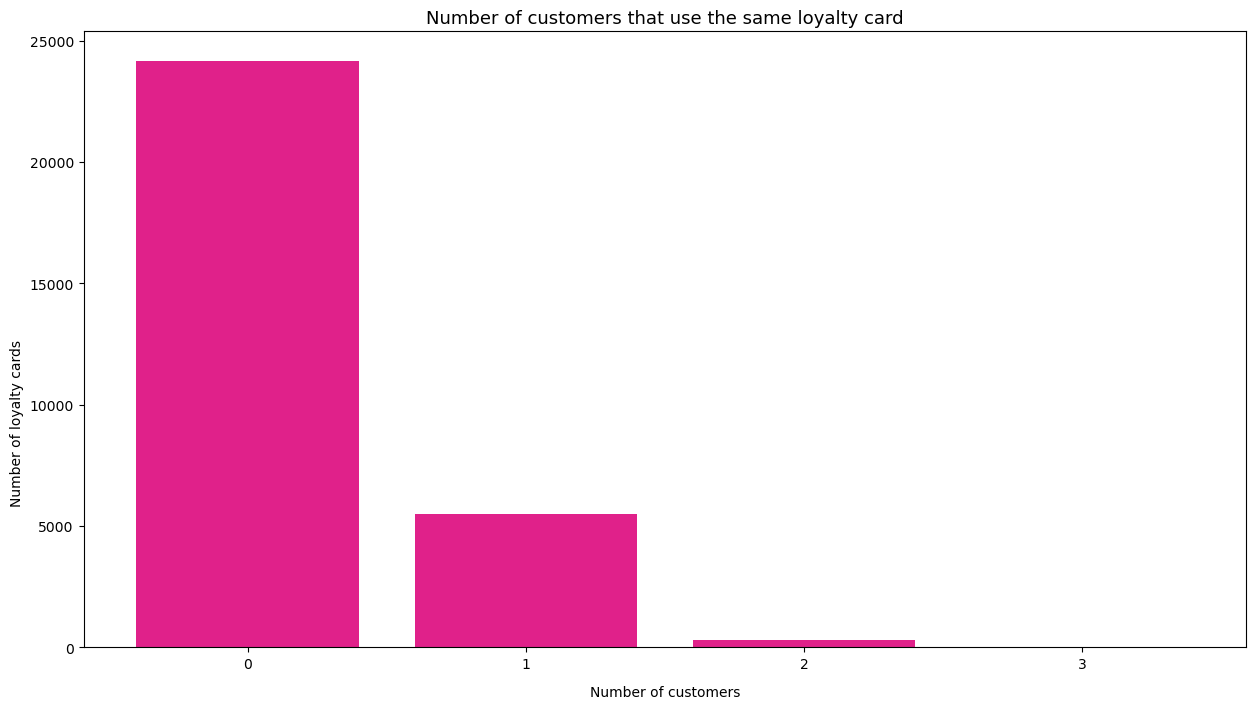

In [39]:
bar_chart(n_cust_card.index, n_cust_card.values,
          'Number of customers', 'Number of loyalty cards', 
          'Number of customers that use the same loyalty card')

Majority of customers do not have a loyalty card. Few customers share a loyalty card.

##### Box plots of lifetime spent variables.

In [40]:
# create new variables with the information we need for the boxplots
spend_groups = num_cust_info[['lifetime_spend_vegetables',
                        'lifetime_spend_nonalcohol_drinks','lifetime_spend_alcohol_drinks','lifetime_spend_meat',
                        'lifetime_spend_hygiene','lifetime_spend_videogames']]
fish_group = num_cust_info['lifetime_spend_fish']
groc_group = num_cust_info['lifetime_spend_groceries']
elec_group = num_cust_info['lifetime_spend_electronics']

We separeted in different groups to better analyse the boxplots.

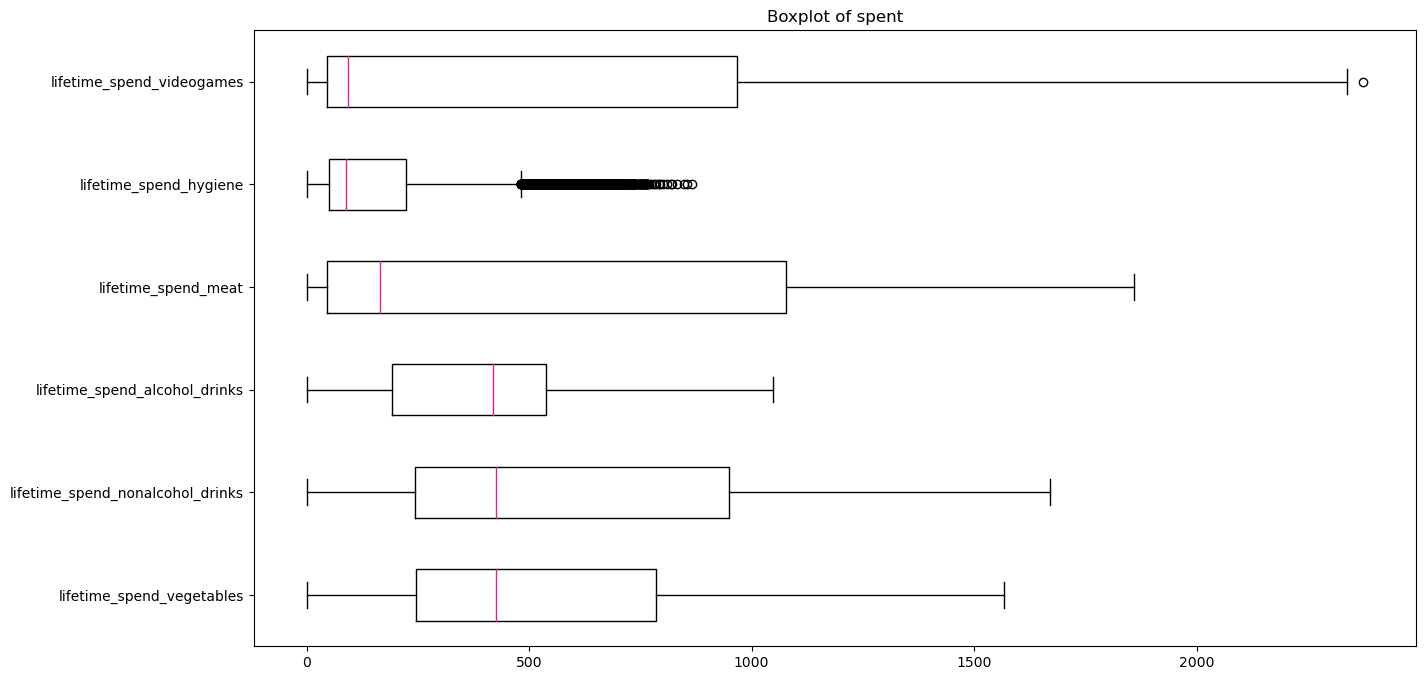

In [41]:
boxplot(spend_groups, 
        ['lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks','lifetime_spend_alcohol_drinks','lifetime_spend_meat',
        'lifetime_spend_hygiene','lifetime_spend_videogames'],
       'spent')

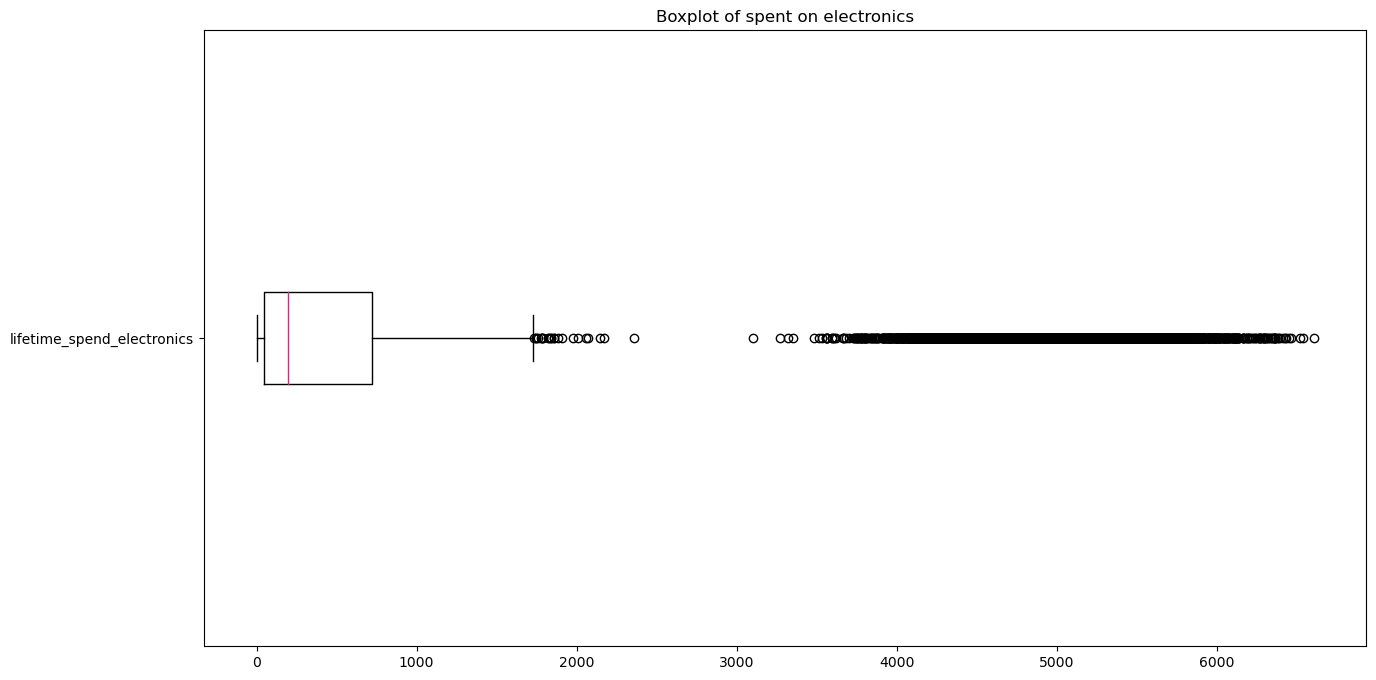

In [42]:
boxplot(elec_group,
       ['lifetime_spend_electronics'],
       'spent on electronics')

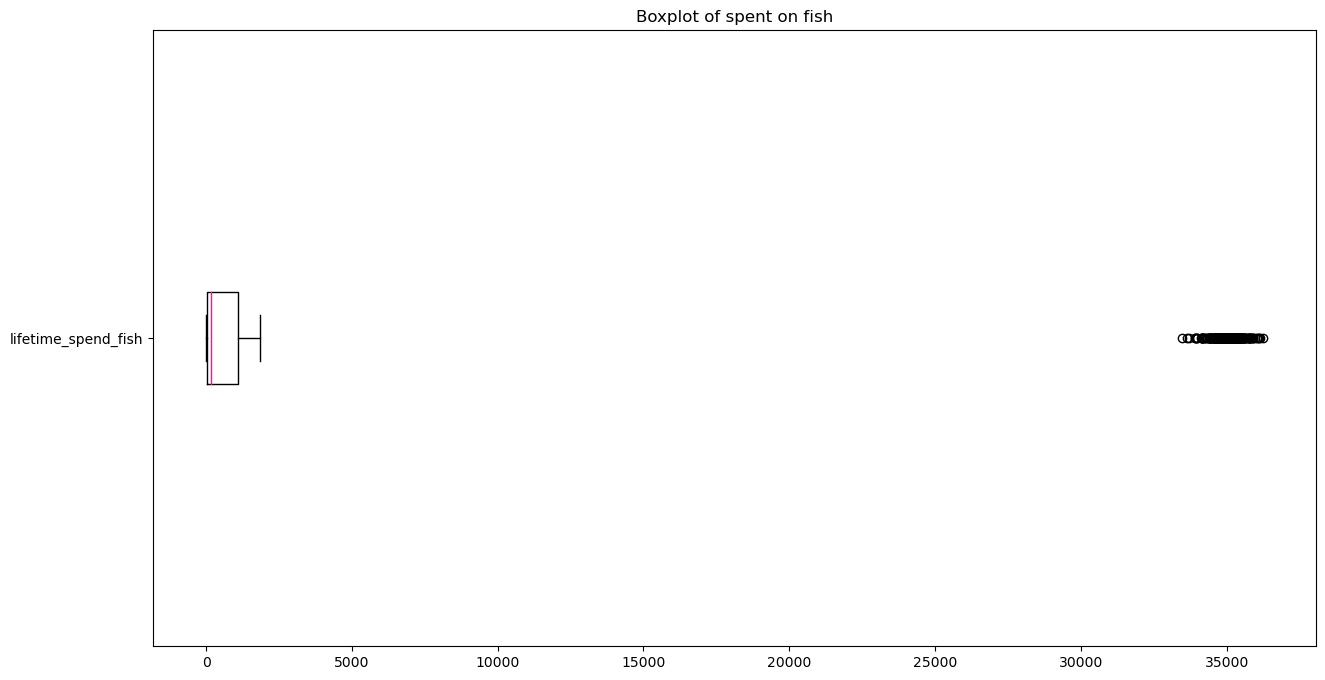

In [43]:
boxplot(fish_group,
       ['lifetime_spend_fish'],
       'spent on fish')

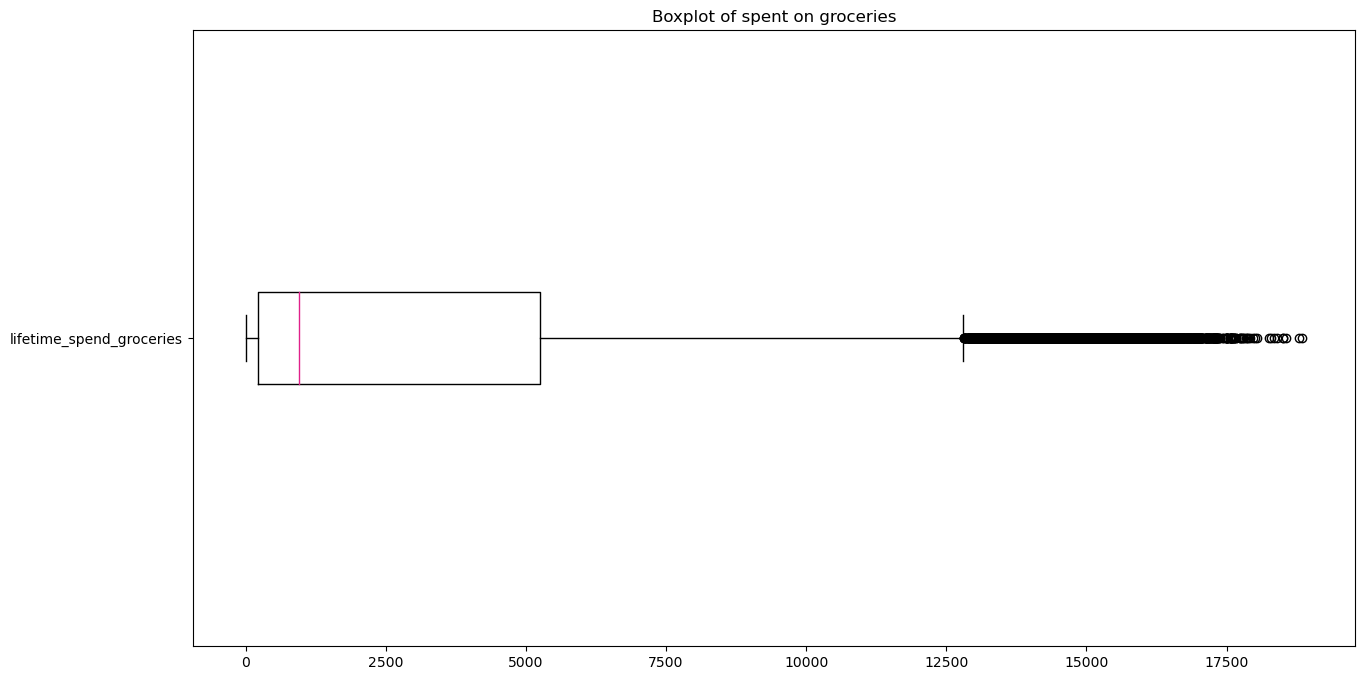

In [44]:
boxplot(groc_group,
       ['lifetime_spend_groceries'],
       'spent on groceries')

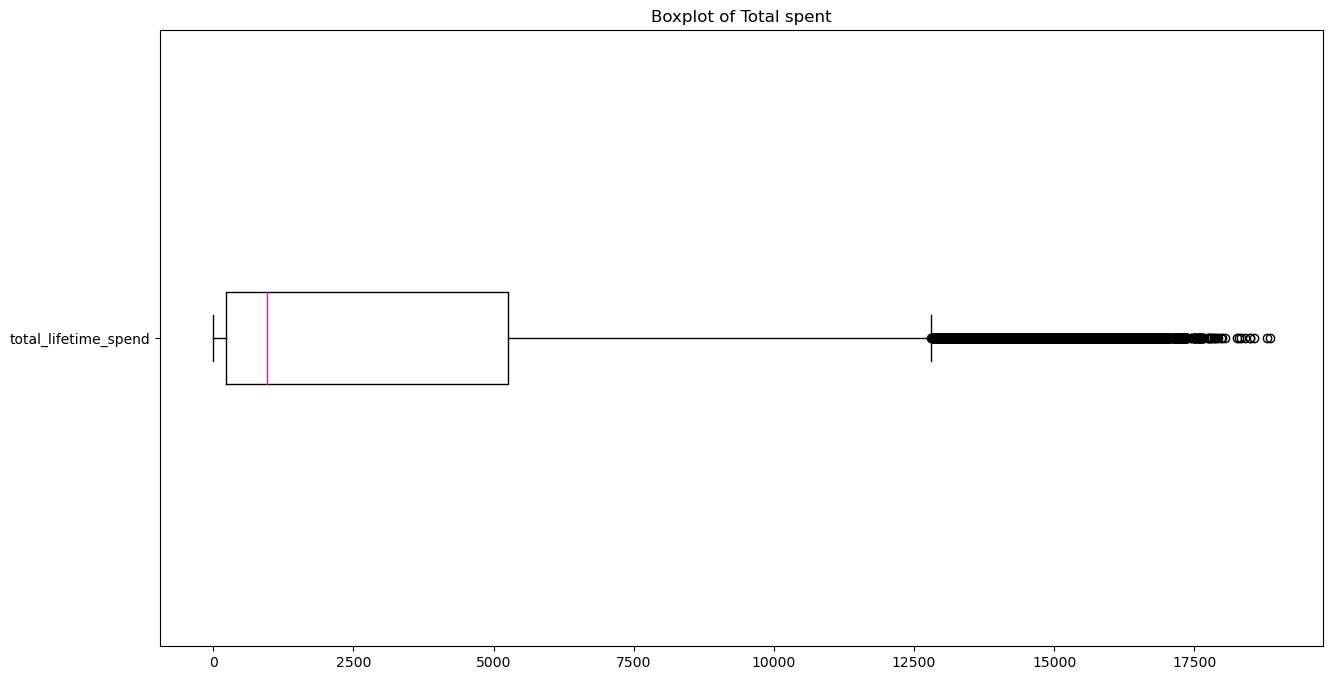

In [45]:
boxplot(groc_group,
       ['total_lifetime_spend'],
       'Total spent')

##### See the location of the customers.

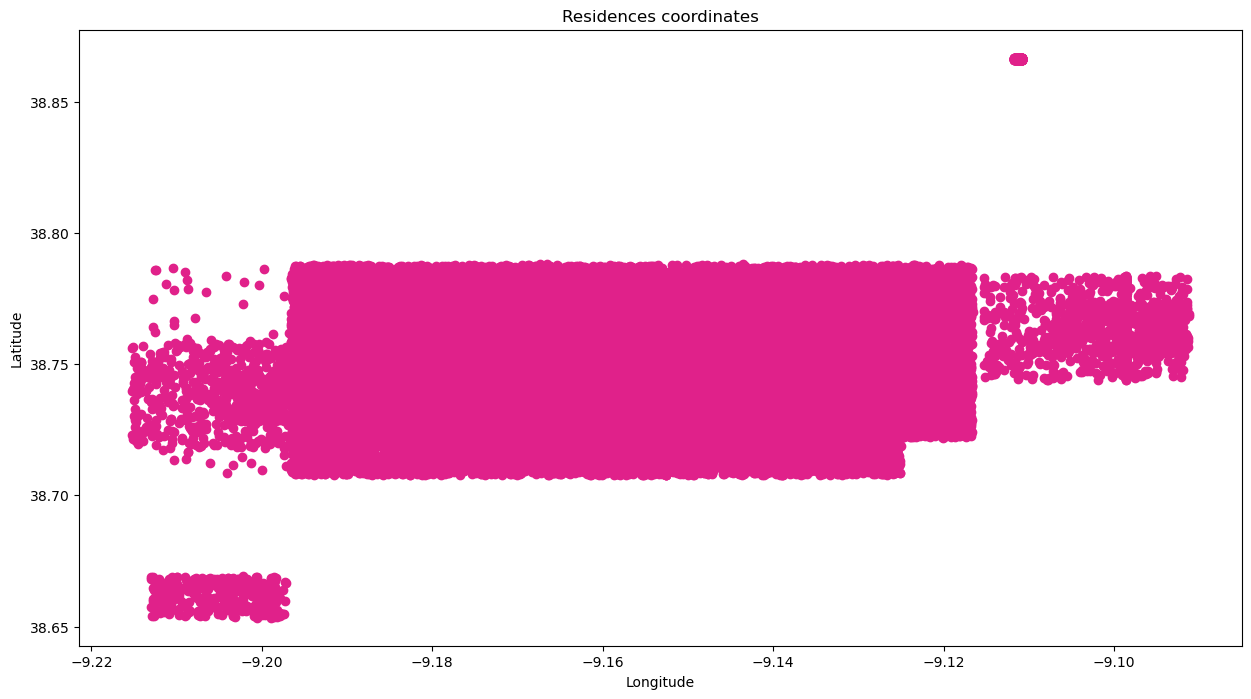

In [47]:
# Create a scatter plot to see the coordinates 
plt.scatter(
    cust_info.longitude,
    cust_info.latitude,
    color = '#e0218a'
    )

# Choose a title and the axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Residences coordinates')

# Show the plot
plt.show()

In [48]:
# Create a scatter mapbox figure 
fig = px.scatter_mapbox(cust_info, lat='latitude', lon='longitude', title ='Customers Addresses')

# Set the mapbox style and center on Lisbon, change the color of the title
fig.update_layout(mapbox_style='open-street-map', mapbox_center={'lat': 38.736946, 'lon': -9.142685}, mapbox_zoom=9, title_font_color="#e0218a")

# Modify the marker color
fig.update_traces(marker = {'color':'#e0218a'})

# Show the figure
fig.show()

##### See the relation of the different categories

In [49]:
spend = num_cust_info[['lifetime_spend_groceries','lifetime_spend_electronics','lifetime_spend_vegetables',
                        'lifetime_spend_nonalcohol_drinks','lifetime_spend_alcohol_drinks','lifetime_spend_meat',
                        'lifetime_spend_fish','lifetime_spend_hygiene','lifetime_spend_videogames','total_lifetime_spend']]

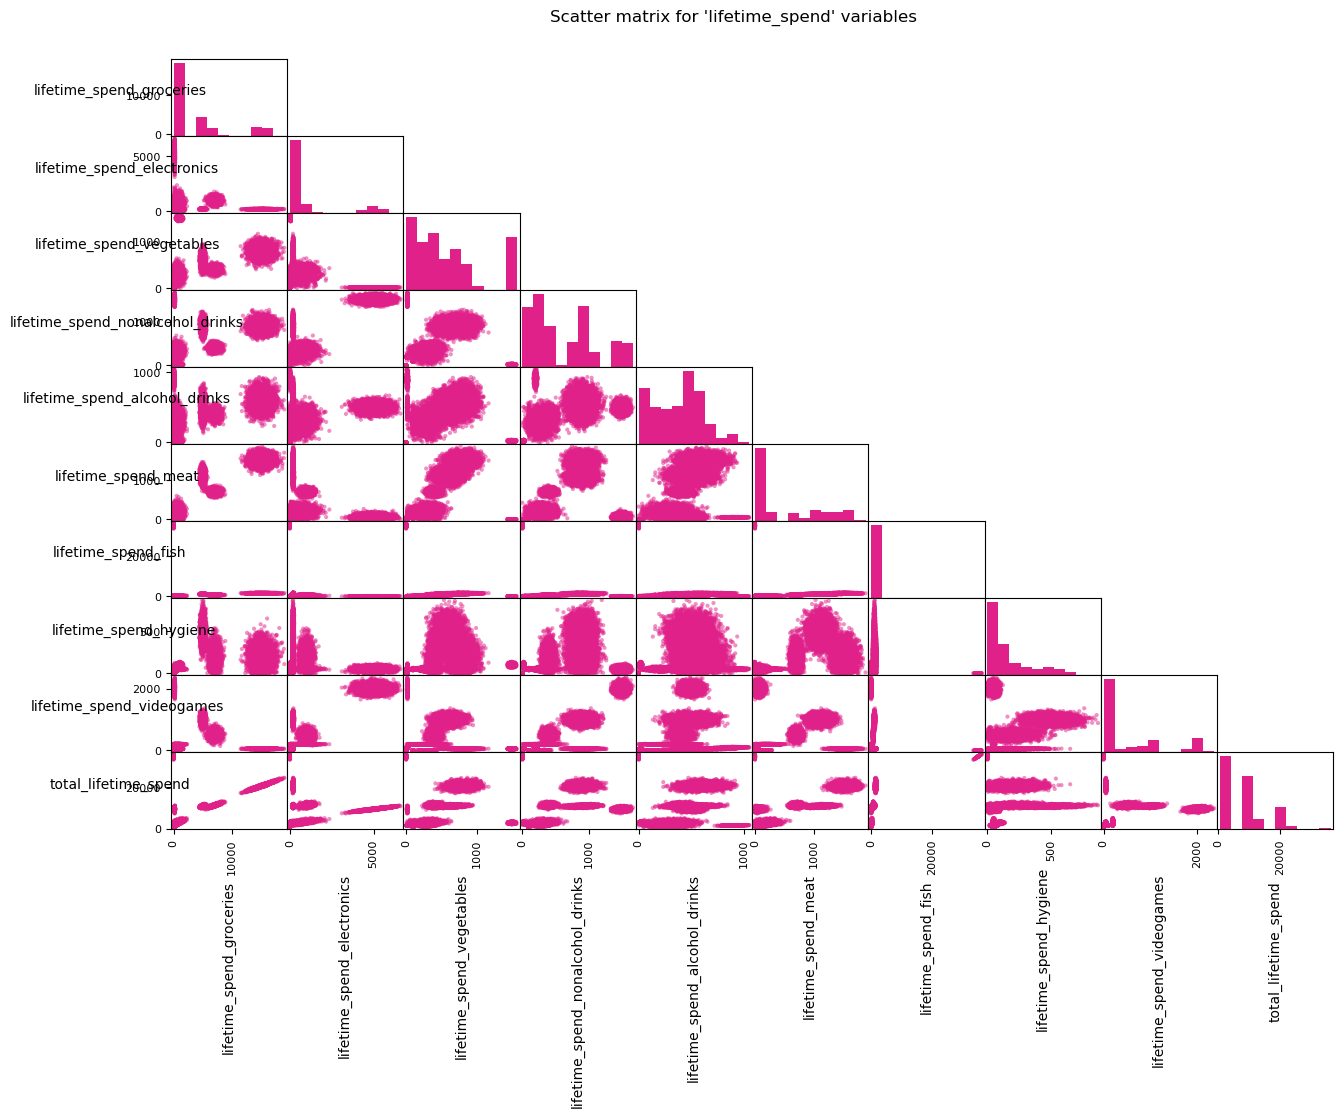

In [91]:
# Create a scatter matrix
scattermatrix = scatter_matrix(spend,diagonal='hist', color = '#e0218a',hist_kwds = {'color': '#e0218a'},figsize=(15,10))

# Get the number of columns in the matrix
n = scattermatrix.shape[1]

# Mask the upper triangle of the matrix
for i in range(n):
    for j in range(i + 1, n):
        scattermatrix[i, j].set_visible(False)
        
# Rotate the axis labels
for ax in scattermatrix.ravel():    
    ax.yaxis.label.set_rotation(0)
    ax.xaxis.label.set_rotation(90)

# Choose a title and make the title appear closer to the graph
plt.suptitle("Scatter matrix for 'lifetime_spend' variables", y = 0.93)
    
# Show the plot
plt.show()

We can see that there is a group of people that spends a lot on vegetables. There is also a group of customers that buy significantly more fish than the rest. <br>
Analyzing the relationship between `lifetime_spend_electronics` and `total_limetime_spend` we can see that there are defined groups. The expence on electronics is not a lot compared to the total. <br>
All this information will be further analyzed in the clustering process.

##### Customers' gender

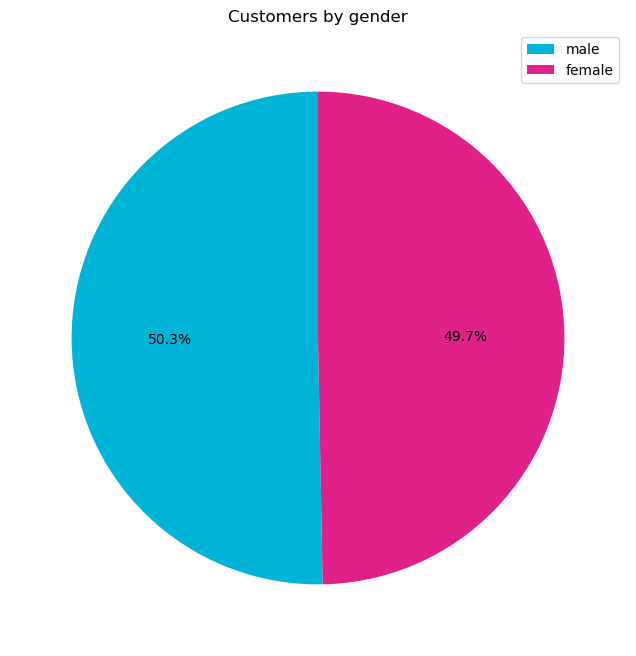

In [51]:
# Create pie chart 
patches, texts, autotexts = plt.pie(cust_info.female.value_counts(), colors=['#00b4d8','#e0218a'],
                                    startangle=90, autopct='%1.1f%%')
# Create the legend
plt.legend(patches, ['male','female'])

# Choose the title
plt.title('Customers by gender')

# Show the plot
plt.show()

We can see that there is no significant difference in our customers.

##### See how many clients had their first transaction in the same year

In [52]:
years = cust_info['year_first_transaction'].value_counts()

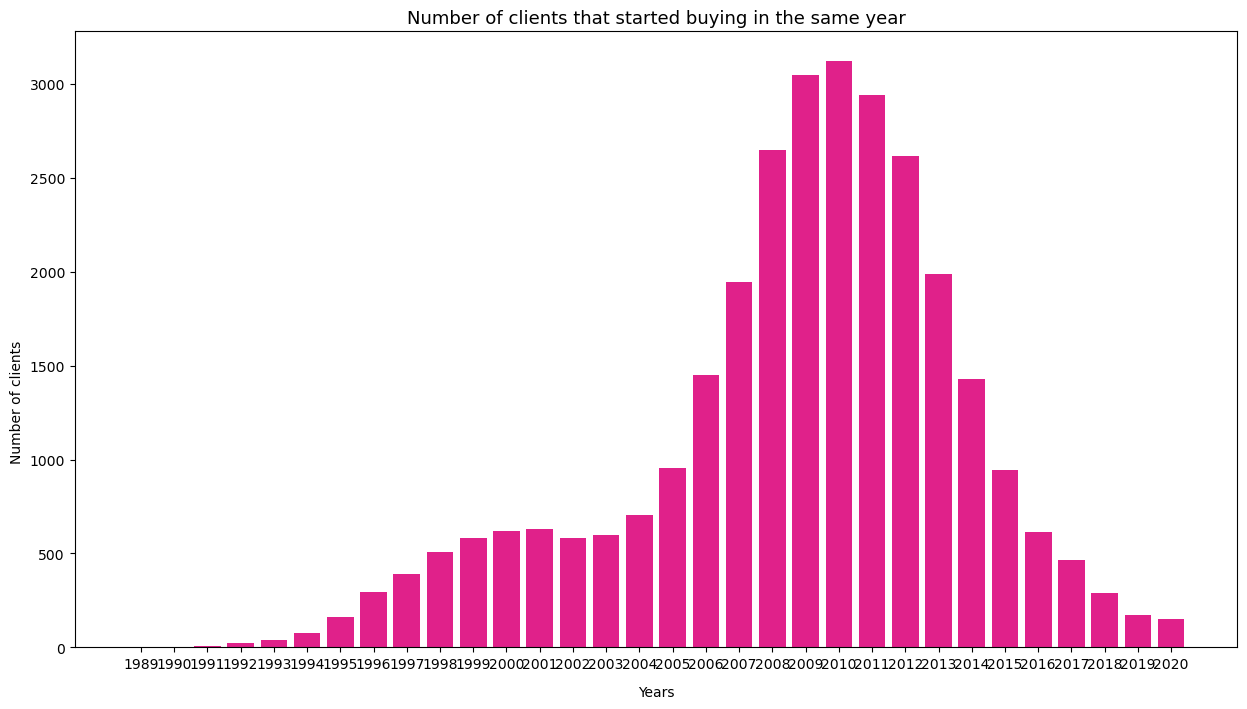

In [53]:
bar_chart(years.index, years.values,
         x_name = 'Years', y_name = 'Number of clients',
         title = 'Number of clients that started buying in the same year')

A lot of people became clients here in between 2008 and 2012.

##### See how many children/teens each client has

In [54]:
dependents = cust_info['number_dependents'].value_counts()

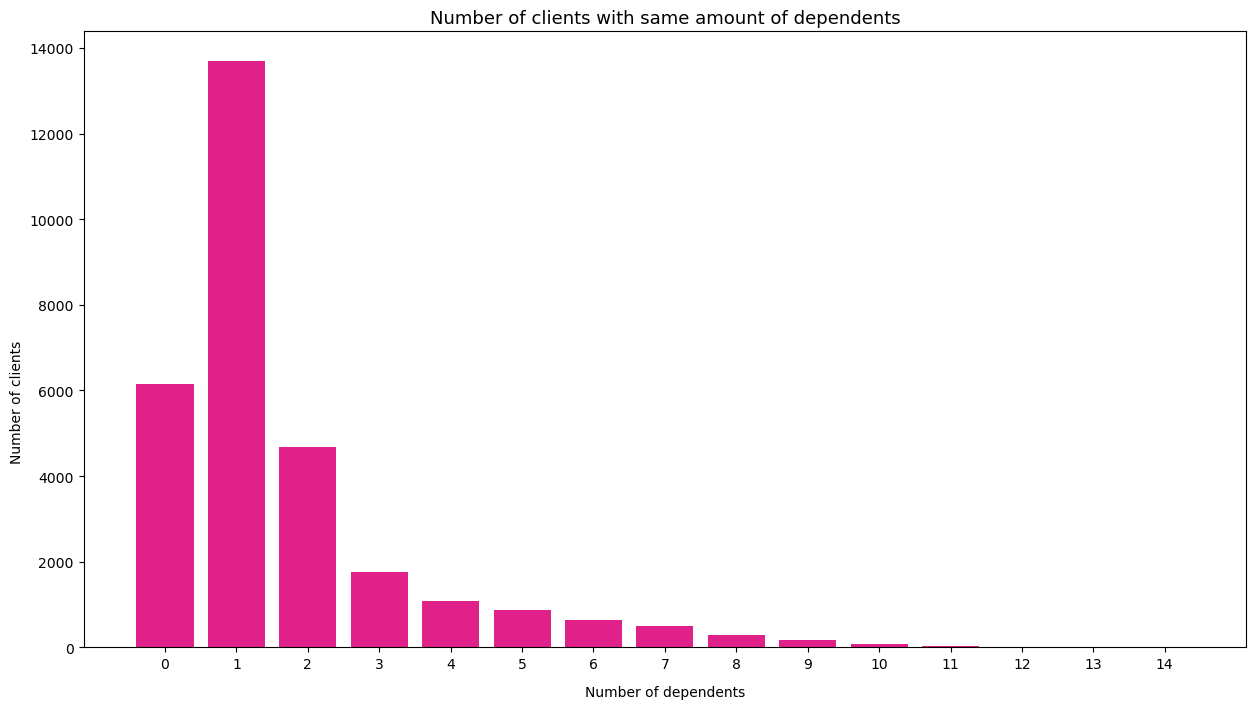

In [55]:
bar_chart(dependents.index, dependents.values,
         x_name = 'Number of dependents', y_name = 'Number of clients',
         title = 'Number of clients with same amount of dependents')

The majority of the clients have either zero or one children. 

##### See at what hours clients usually shop

In [56]:
hours = cust_info['typical_hour'].value_counts()

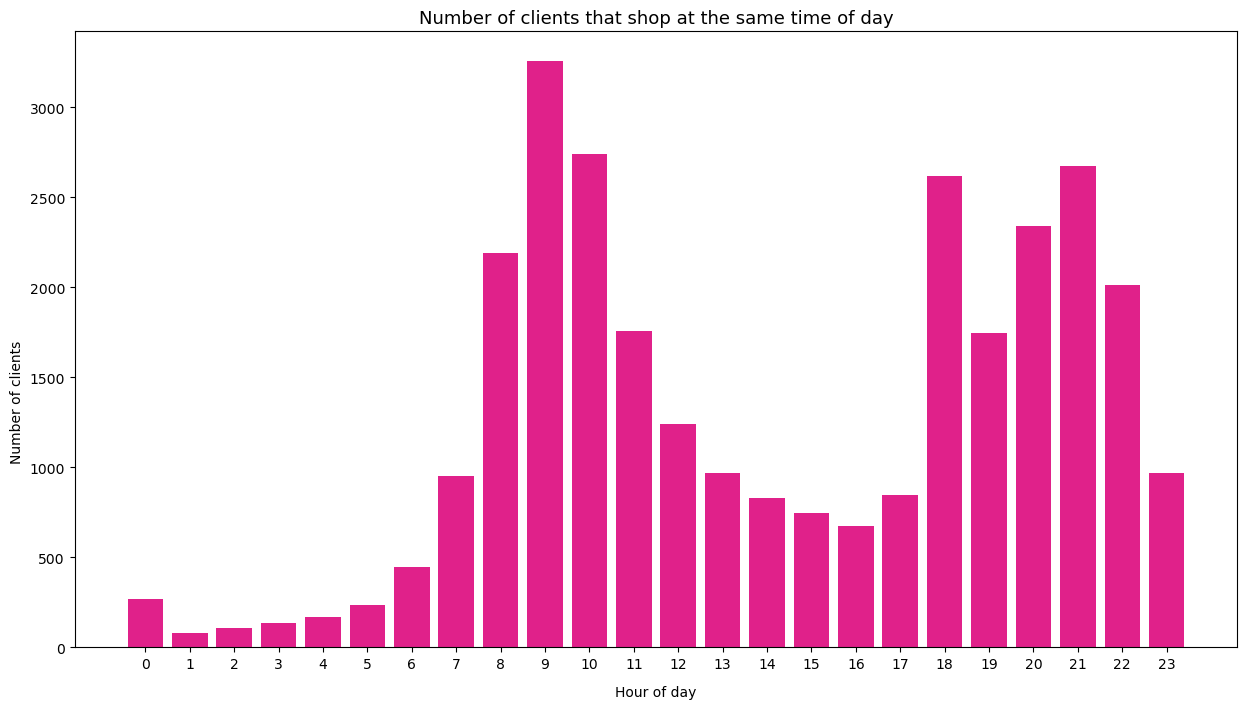

In [57]:
bar_chart(hours.index, hours.values,
         x_name = 'Hour of day', y_name = 'Number of clients',
         title = 'Number of clients that shop at the same time of day')

The biggest peak of customers throughout the day is at 9AM. few customers shop between 11AM and 5PM. 

##### See the number of complaints

In [58]:
complaints = cust_info['number_complaints'].value_counts()

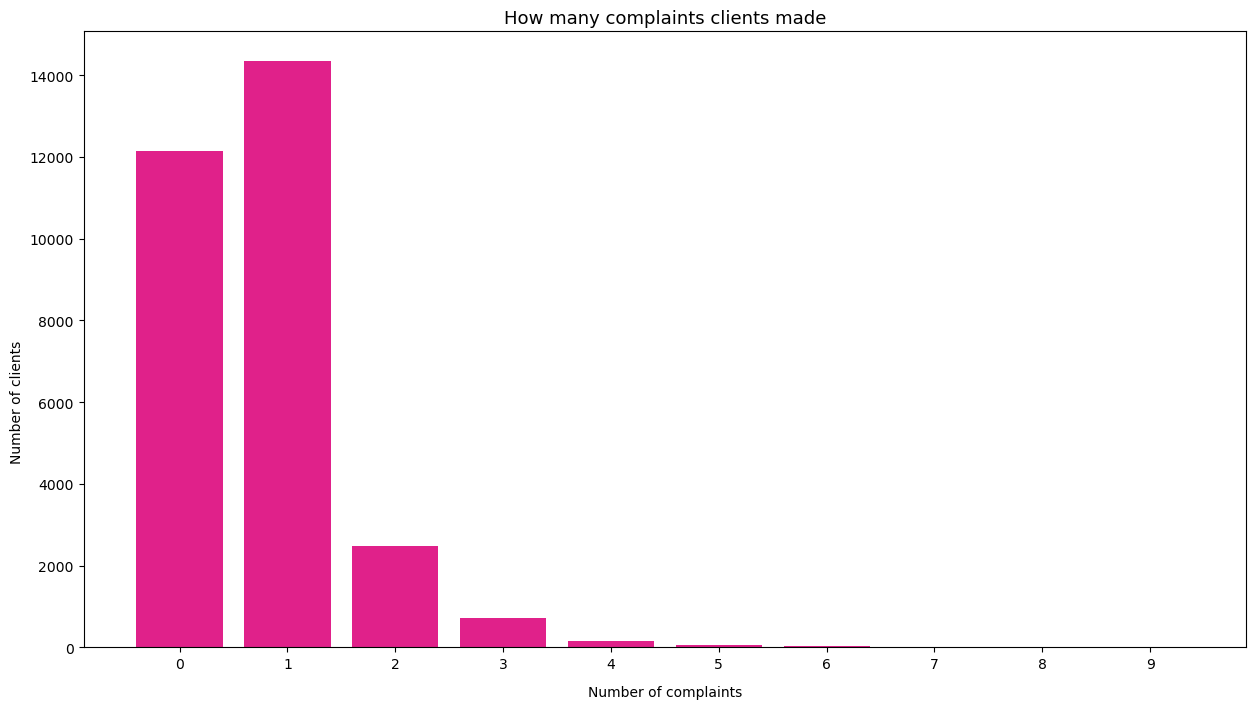

In [59]:
bar_chart(complaints.index, complaints.values,
         'Number of complaints', 'Number of clients', 'How many complaints clients made')

We can see that customers rarely complains more than once.

##### See the number of stores visited

In [60]:
stores = cust_info['distinct_stores_visited'].value_counts()

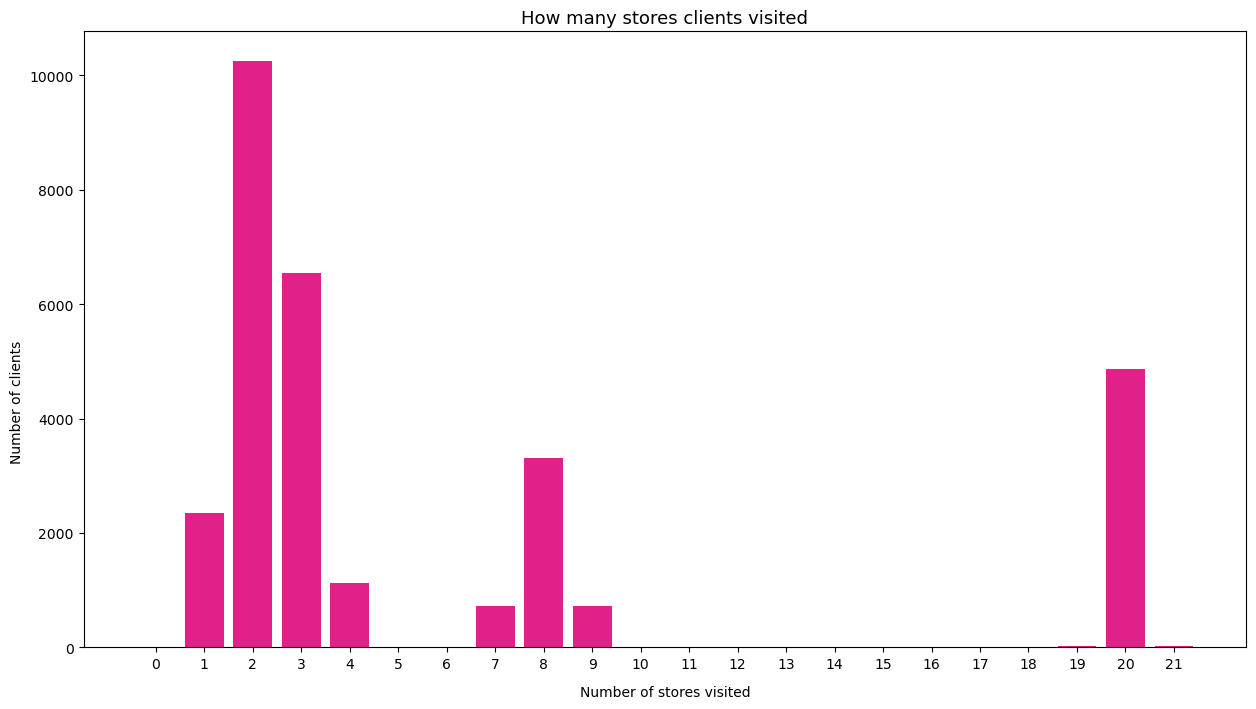

In [61]:
bar_chart(stores.index, stores.values,
         'Number of stores visited', 'Number of clients', 'How many stores clients visited')

We can see that only a small amount of customers visit more than 10 stores.

##### See the distribution of the percentage of items bought on promotion

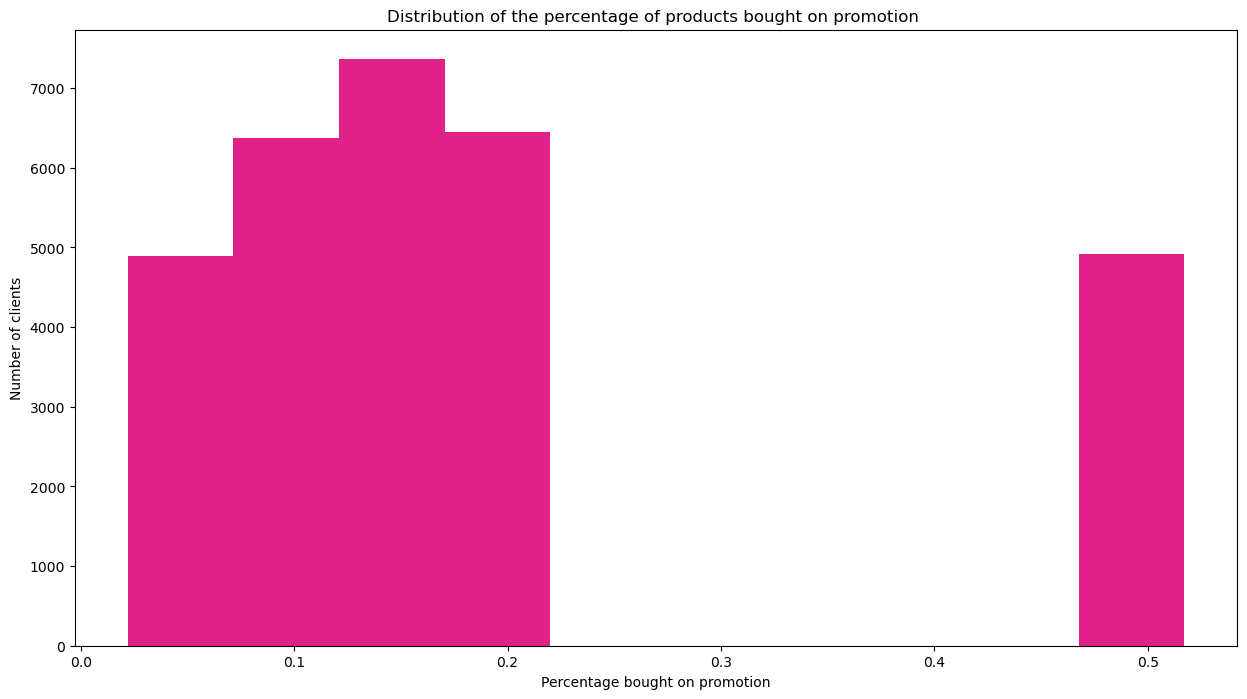

In [62]:
# Create the histogram
plt.hist(cust_info['percentage_of_products_bought_promotion'],color='#e0218a')

# Choose the axis labels
plt.xlabel('Percentage bought on promotion')
plt.ylabel('Number of clients')

# Choose the title
plt.title('Distribution of the percentage of products bought on promotion ')

# Show the graph
plt.show()

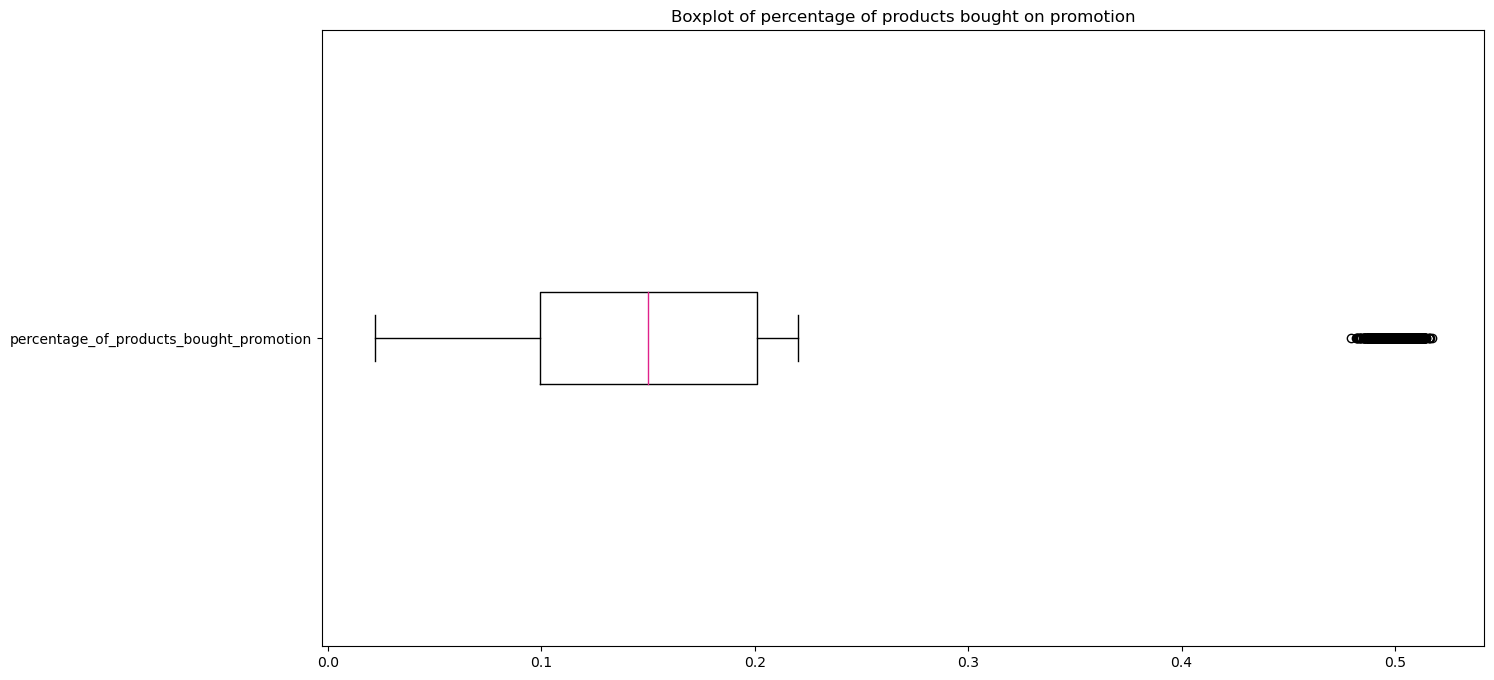

In [63]:
boxplot(cust_info['percentage_of_products_bought_promotion'],
       ['percentage_of_products_bought_promotion'],
       'percentage of products bought on promotion')

The majority of people buys less than 20% of the items on promotion. However, there is a group of people that buy 50% of their items on promotion.

##### See the number of distinct products bought

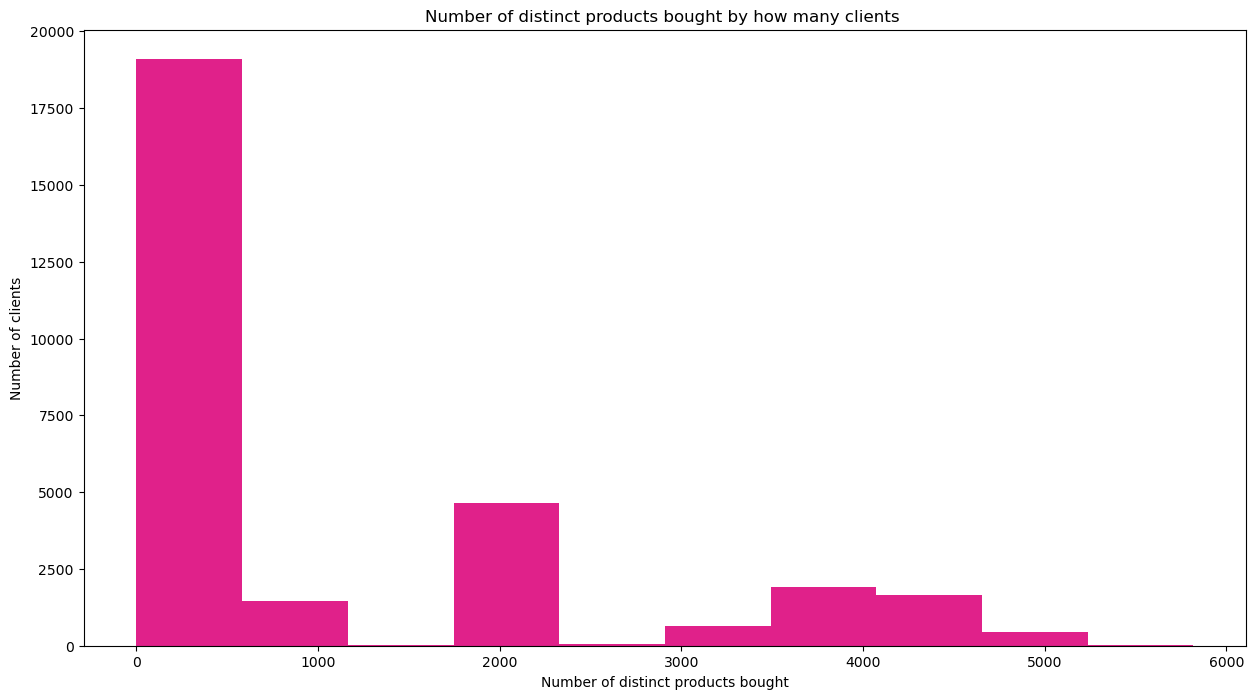

In [64]:
# Create the histogram
plt.hist(cust_info['lifetime_total_distinct_products'],color='#e0218a')

# Choose the axis labels
plt.xlabel('Number of distinct products bought')
plt.ylabel('Number of clients')

# Choose the title
plt.title('Number of distinct products bought by how many clients ')

# Show the graph
plt.show()

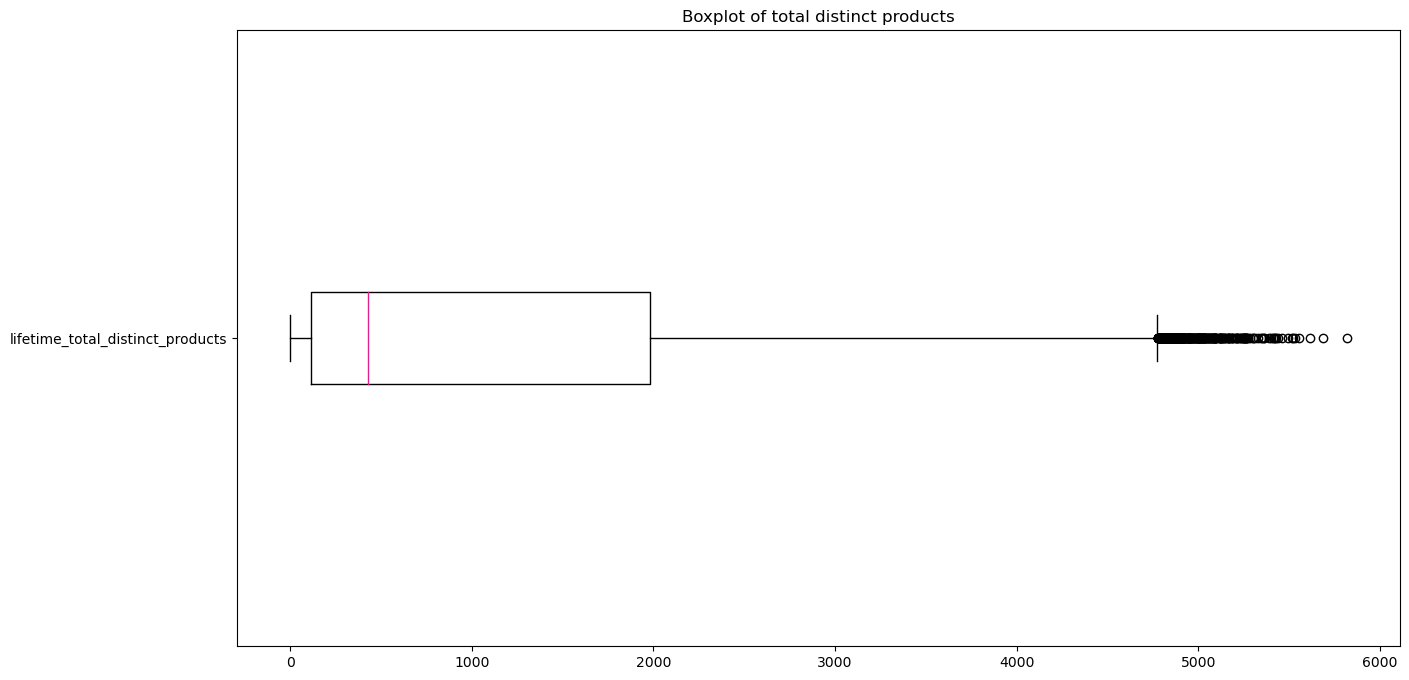

In [65]:
boxplot(cust_info['lifetime_total_distinct_products'],
       ['lifetime_total_distinct_products'],
       'total distinct products')

Most clients have bought less than 1000 different products. There is a significant group of clients that have bought between 3000 and 5000 different items, in their lifetime as clients.

### Categorical Data

In [66]:
educ = cat_cust_info.education.value_counts()

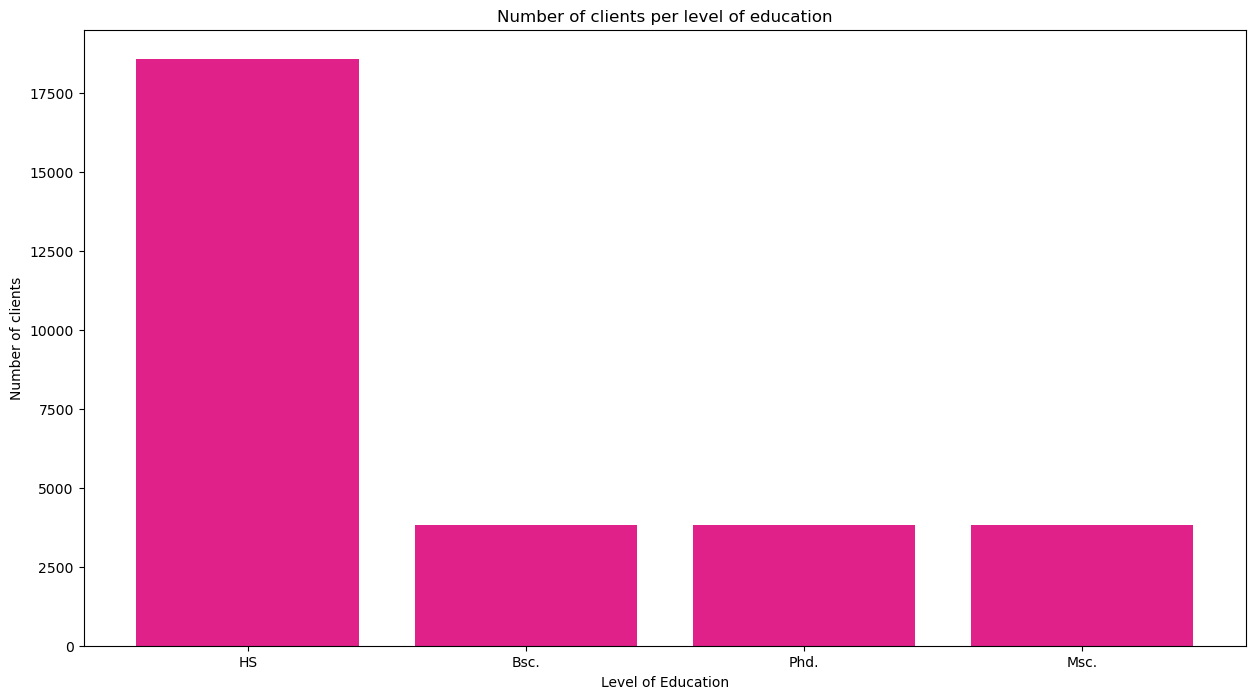

In [67]:
# Create the bar chart
plt.bar(educ.index, educ.values, color='#e0218a')

# Choose axis labels and title
plt.xlabel('Level of Education')
plt.ylabel('Number of clients')
plt.title('Number of clients per level of education')

# Show the plot
plt.show()

## 11. Correlation

Text(0.5, 1.0, 'Correlation Matrix')

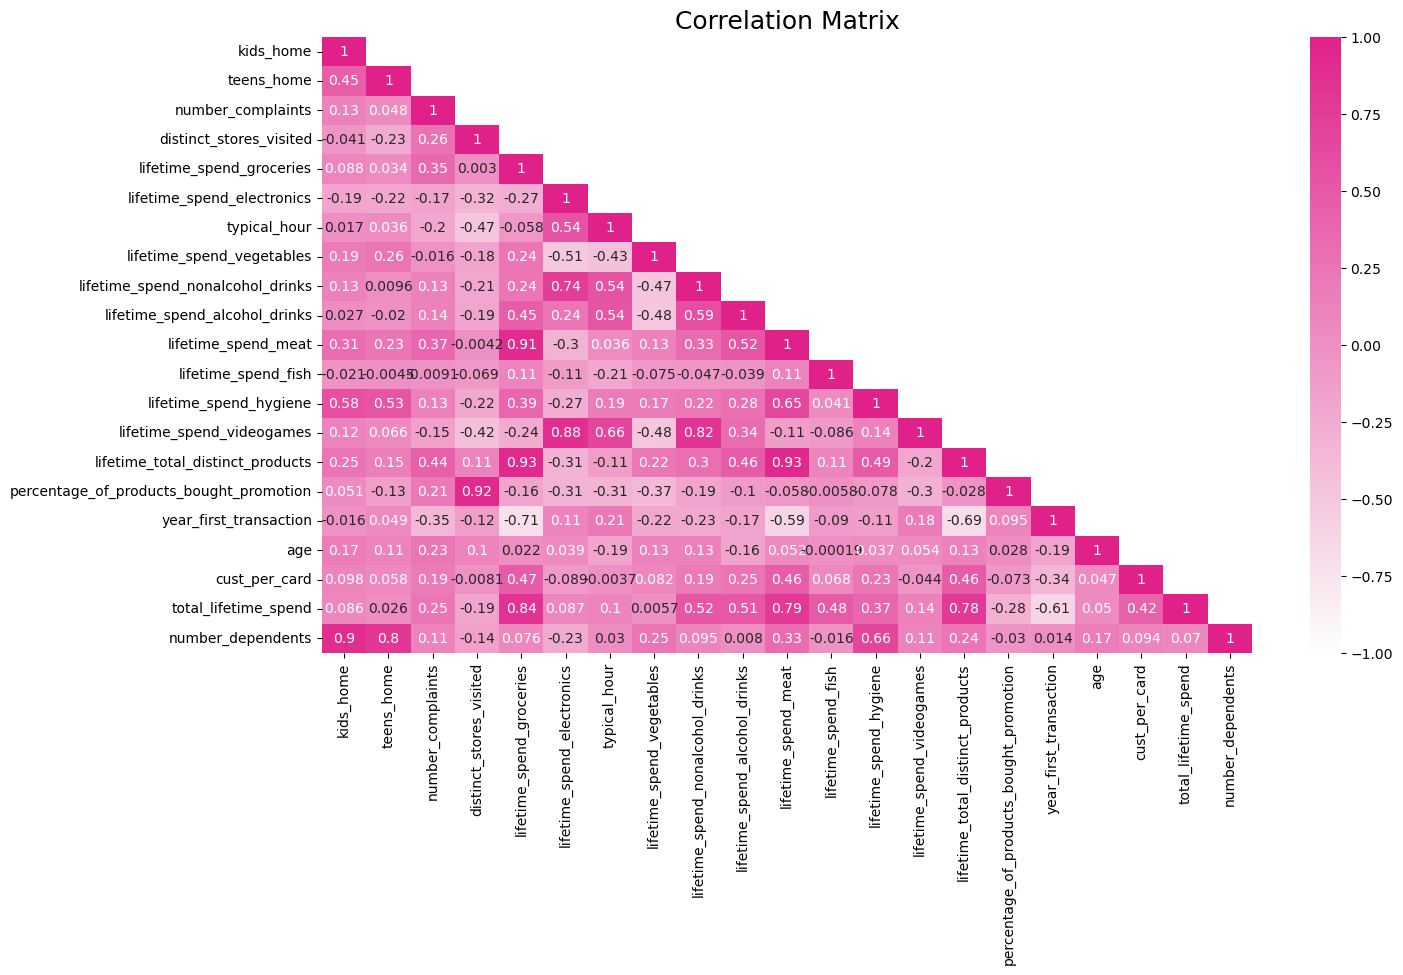

In [68]:
corr = num_cust_info.drop(['female'], axis=1).corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap=sns.color_palette("blend:#fcfffc,#e0218a", as_cmap=True),
        annot=True, mask=np.triu(corr,k=1),vmax = 1, vmin = -1).set_title('Correlation Matrix',fontsize=18)

## 12. Explore

In [69]:
last_names = cust_info['customer_name'].str.split().str[-1]

# Group the data by last name and calculate the statistics for each variable
grouped_data = cust_info.groupby(last_names)[num_cust_info.columns]

# Filter the groups based on count restriction
filtered_data = grouped_data.filter(lambda x: len(x) > 100)

# Calculate the statistics for each variable within each filtered group
statistics = filtered_data.groupby(last_names)[num_cust_info.columns].agg(['mean', 'max'])

statistics

kids_home     teens_home     number_complaints      \
                   mean max       mean max              mean max   
customer_name                                                      
Anderson       0.859813   5   0.448598   3          0.766355   4   
Brown           1.08427   8        0.5   4          0.724719   4   
Davis          1.335366   7   0.646341   7          0.969512   8   
Harris         1.137255   6   0.460784   5          0.823529   6   
Johnson        1.206406   7   0.476868   6           0.72242   3   
Jones          1.201005   7   0.542714   5           0.81407   4   
Miller         1.014493   6   0.326087   4          0.833333   6   
Smith          1.214511   8   0.567823   6          0.731861   3   
Supermarket         0.0   0        0.0   0               0.0   0   
Taylor         1.431193   9   0.522936   4          0.825688   4   
Williams       1.133603   7   0.518219   4          0.850202   6   
Wilson         1.025641   5   0.521368   4          0.692308   6   

              distinct_stores_visited     lifetime_spend_groceries  \
                                 mean max                     mean   
customer_name                                                        
Anderson                     4.841121  20              3388.700935   
Brown                        6.196629  20              4242.808989   
Davis                        6.115854  21              5004.939024   
Harris                       6.392157  21              4525.058824   
Johnson                      6.096085  20              4398.000000   
Jones                        5.829146  20              3704.507538   
Miller                       6.550725  20              4913.688406   
Smith                        6.611987  20              4441.034700   
Supermarket                       1.0   1                 2.701888   
Taylor                       6.229358  20              4203.302752   
Williams                     6.469636  21              3734.093117   
Wilson                       5.547009  20              3261.188034   

                             ...        age        female     cust_per_card  \
                        max  ...       mean max      mean max          mean   
customer_name                ...                                              
Anderson       15456.000000  ...  52.056075  81  0.476636   1      0.177570   
Brown          17208.000000  ...  54.926966  83  0.483146   1      0.230337   
Davis          17353.000000  ...  52.548780  82  0.475610   1      0.256098   
Harris         16824.000000  ...  53.705882  83  0.549020   1      0.254902   
Johnson        16944.000000  ...  52.274021  83  0.476868   1      0.245552   
Jones          17493.000000  ...  53.070352  83  0.517588   1      0.185930   
Miller         17582.000000  ...  51.731884  83  0.521739   1      0.239130   
Smith          17212.000000  ...  53.135647  82  0.485804   1      0.220820   
Supermarket        2.844843  ...  50.625000  83  0.553571   1      0.111607   
Taylor         16887.000000  ...  52.458716  81  0.495413   1      0.211009   
Williams       17748.000000  ...  54.643725  83  0.558704   1      0.186235   
Wilson         17744.000000  ...  50.239316  83  0.487179   1      0.153846   

                  total_lifetime_spend               number_dependents      
              max                 mean           max              mean max  
customer_name                                                               
Anderson        2          7987.971963  21090.000000          1.308411   8  
Brown           2          8593.882022  23144.000000           1.58427  12  
Davis           2          9491.012195  23338.000000          1.981707  11  
Harris          2          8959.343137  22714.000000          1.598039   7  
Johnson         2          8781.131673  22670.000000          1.683274  13  
Jones           2          8116.000000  23238.000000          1.743719  10  
Miller          1          8953.891304  23487.000000           

## 13.Export Datasets

In [70]:
cust_info.to_csv('cust_data.csv')